<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on practice lab: Model Development**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.


# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.


In [4]:
#This function will download the dataset into your browser 

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

Load the dataset into a pandas dataframe


In [5]:
df = pd.read_csv(filepath, header=0)

# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [6]:
lm = LinearRegression()

X = df[["CPU_frequency"]]
Y = df["Price"]

lm.fit(X, Y)
Yhat = lm.predict(X)

for i in range(5):
    print(Y[i],"\t",Yhat[i])


978 	 1073.078343915017
634 	 1277.932637222316
946 	 1636.4276505100893
1244 	 1073.078343915017
837 	 1175.5054905686666


<details>
    <summary>Click here for Solution</summary>

```python
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)
```

</details>


Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


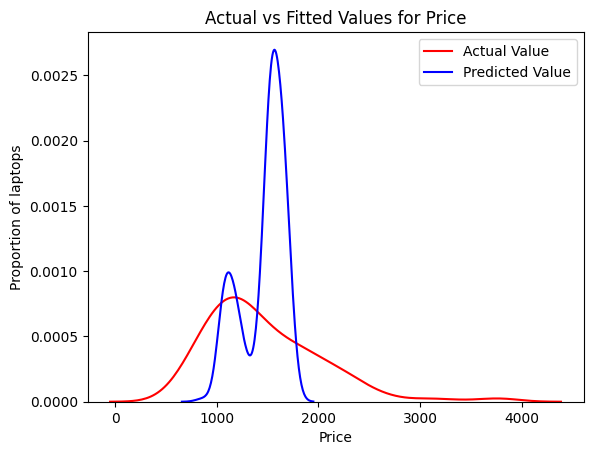

In [7]:
#deprecated
#ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
#sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


ax1 = sns.kdeplot(Y,  color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.kdeplot(Yhat,  color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()
```

</details>


Evaluate the Mean Squared Error and R^2 score values for the model. 


In [8]:
# Write your code below and press Shift+Enter to execute 
r2 = lm.score(X=X, y=Y)
mse = mean_squared_error(y_true=Y, y_pred=Yhat)

print("R^2:",r2)
print("MSE:",mse)

R^2: 0.1344436321024326
MSE: 284583.4405868629


<details>
    <summary>Click here for Solution</summary>

```python
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)
```

</details>


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system. 


In [10]:
lm1 = LinearRegression()
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
lm1.fit(Z,Y)
Y1_hat = lm1.predict(Z)

for i in range(5):
    print(Y[i],Y1_hat[i])

978 1345.5162277078464
634 710.4490549630189
946 1552.3724268717976
1244 1295.0068101221361
837 1543.1384702215203


<details>
    <summary>Click here for Solution</summary>

```python
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)
```

</details>


Plot the Distribution graph of the predicted values as well as the Actual values


Text(0, 0.5, 'Proportion of laptops')

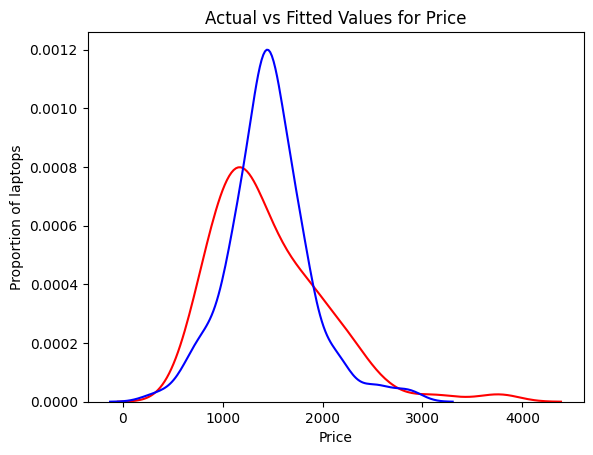

In [11]:
ax1 = sns.kdeplot(Y,  color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.kdeplot(Y1_hat,  color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

<details>
    <summary>Click here for Solution</summary>

```python
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

```

</details>


Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [16]:
r2 = lm1.score(Z,Y)
mse = mean_squared_error(Y, Y1_hat)

print('R2:', r2)
print('MSE:', mse)

R2: 0.5082509055187376
MSE: 161680.57263893104


<details>
    <summary>Click here for Solution</summary>

```python
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
```

</details>


# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 


In [39]:
x = df['CPU_frequency']
y = df['Price']
f1 = np.polyfit(x, y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(x, y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(x, y, 5)
p5 = np.poly1d(f5)


print(p1)
print(p3)
print(p5)

 
1485 x + 253.7
           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


<details>
    <summary>Click here for Solution</summary>

```python
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)
```

</details>


Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.


In [28]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

Call this function for the 3 models created and get the required graphs.


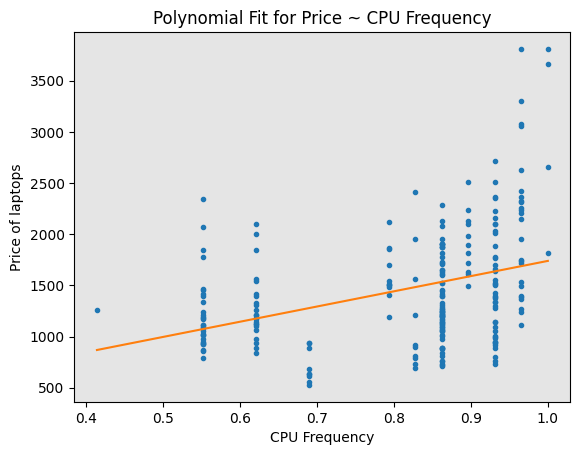

In [29]:
# Call for function of degree 1
PlotPolly(p1, x, y, 'CPU Frequency')


<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p1, X, Y, 'CPU_frequency')
```

</details>


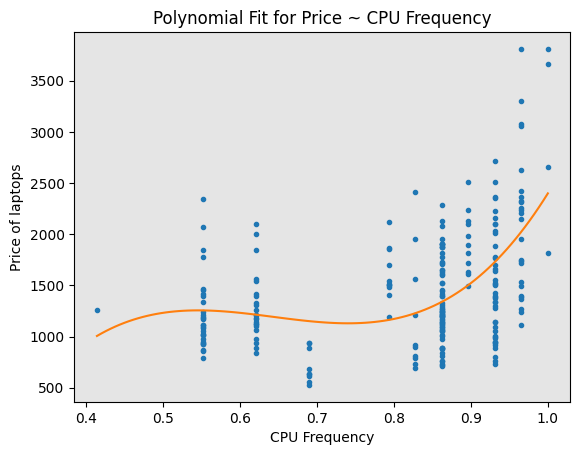

In [40]:
# Call for function of degree 3
PlotPolly(p3, x, y, 'CPU Frequency')


<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p3, X, Y, 'CPU_frequency')
```

</details>


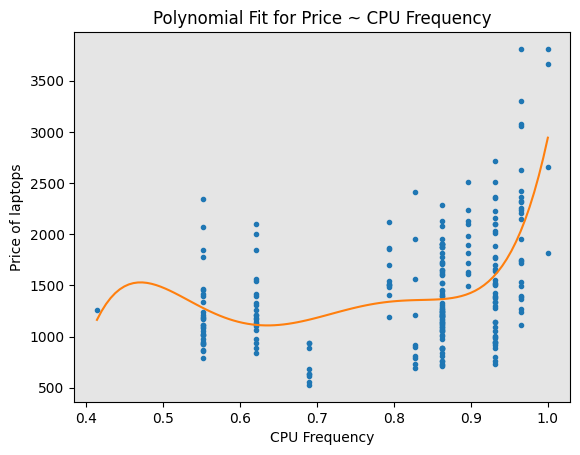

In [41]:
# Call for function of degree 5
PlotPolly(p5, x, y, 'CPU Frequency')


<details>
    <summary>Click here for Solution</summary>
    
```python
PlotPolly(p5, X, Y, 'CPU_frequency')
```

</details>


Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.


In [42]:
r2_p1 = r2_score(y, p1(x))
mse_p1 = mean_squared_error(y, p1(x))

r2_p3 = r2_score(y, p3(x))
mse_p3 = mean_squared_error(y, p3(x))

r2_p5 = r2_score(y, p5(x))
mse_p5 = mean_squared_error(y, p5(x))

print("R2 degree 1:", r2_p1)
print("MSE degree 1:", mse_p1)
print("R2 degree 3:", r2_p3)
print("MSE degree 3:", mse_p3)
print("R2 degree 5:", r2_p5)
print("MSE degree 5:", mse_p5)

R2 degree 1: 0.1344436321024326
MSE degree 1: 284583.4405868629
R2 degree 3: 0.2669264079653113
MSE degree 3: 241024.86303848765
R2 degree 5: 0.3030822706443915
MSE degree 5: 229137.29548053455


<details>
    <summary>Click here for Solution</summary>
    
```python
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))
```

</details>


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline. 


In [46]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)

for i in range(5):
    print(y[i], '\t', ypipe[i])

978 	 1484.267578125
634 	 778.427734375
946 	 1267.880859375
1244 	 1009.728515625
837 	 1505.310546875


<details>
    <summary>Click here for Solution</summary>
    
```python
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
```

</details>


Evaluate the MSE and R^2 values for the this predicted output.


In [47]:
print('MSE: ', mean_squared_error(Y, ypipe))
print('R2: ', r2_score(Y, ypipe))

MSE:  120595.80746232362
R2:  0.6332096172725036


<details>
    <summary>Click here for Solution</summary>
    
```python
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

```

</details>


You should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
